<a href="https://colab.research.google.com/github/haytham918/low-rank-expectile/blob/main/LRE_ActualData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import scipy

In [27]:
df= pd.read_csv("/content/drive/MyDrive/low-rank-expectile/heartrate_seconds_merged.csv")

# Convert 'Time' column to datetime type
df['Time'] = pd.to_datetime(df['Time'])

# Round each time down to the 5-min interval
df['Time'] = df['Time'].dt.floor('5min')

# Create a new column with just the Date
df['Date'] = df['Time'].dt.date

# Create a new column for the 5-minute interval index
df['Interval'] = df['Time'].dt.strftime('%H:%M')

# Group by 'Id', 'Date', and 'Interval' then calculate median
# Unstack such that level[0] is Id and level[1] is Date
df_median = df.groupby(['Id', 'Date', 'Interval'])['Value'].median().unstack(level=[0,1])

# Reindex to include all 5-minute intervals over a day and missing values with Nan
all_intervals = pd.date_range(start='00:00', end='23:55', freq='5min').strftime('%H:%M')
df_median = df_median.reindex(all_intervals)

df_median.head(200)

Id    2022484408                                                         \
Date  2016-04-12 2016-04-13 2016-04-14 2016-04-15 2016-04-16 2016-04-17   
00:00        NaN        NaN        NaN        NaN        NaN        NaN   
00:05        NaN        NaN        NaN        NaN        NaN        NaN   
00:10        NaN        NaN        NaN        NaN        NaN        NaN   
00:15        NaN        NaN        NaN        NaN        NaN        NaN   
00:20        NaN        NaN        NaN        NaN        NaN        NaN   
...          ...        ...        ...        ...        ...        ...   
16:15       93.5       95.0       84.5       76.0        NaN       67.0   
16:20       66.0       81.0       79.5       71.0       70.0       61.0   
16:25       58.0       71.0       58.5       77.0        NaN       83.5   
16:30       63.5       64.0       61.0       98.0        NaN       88.0   
16:35       63.0       63.0       55.0      100.5        NaN       81.0   

Id                                                 ... 8877689391             \
Date  2016-04-18 2016-04-19 2016-04-20 2016-04-21  ... 2016-05-03 2016-05-04   
00:00        NaN        NaN        NaN        NaN  ...        NaN        NaN   
00:05        NaN        NaN        NaN        NaN  ...        NaN        NaN   
00:10        NaN        NaN        NaN        NaN  ...        NaN        NaN   
00:15        NaN        NaN        NaN        NaN  ...        NaN        NaN   
00:20        NaN        NaN        NaN        NaN  ...        NaN        NaN   
...          ...        ...        ...        ...  ...        ...        ...   
16:15       86.5      104.5       94.0       79.5  ...       59.5       69.0   
16:20       97.0      113.0       97.0       89.0  ...       59.5       61.0   
16:25       97.0      155.5       82.0       85.0  ...       59.5       71.0   
16:30        NaN      131.0       72.0      199.0  ...       60.0       72.0   
16:35        NaN      123.0       69.0      185.0  ...       58.0       72.0   

Id                                                                       \
Date  2016-05-05 2016-05-06 2016-05-07 2016-05-08 2016-05-09 2016-05-10   
00:00        NaN        NaN        NaN        NaN        NaN        NaN   
00:05        NaN        NaN        NaN        NaN        NaN        NaN   
00:10        NaN        NaN        NaN        NaN        NaN        NaN   
00:15        NaN        NaN        NaN        NaN        NaN        NaN   
00:20        NaN        NaN        NaN        NaN        NaN        NaN   
...          ...        ...        ...        ...        ...        ...   
16:15       70.0       87.0       82.0       82.0       96.0       60.0   
16:20       72.0       96.0       70.0       74.0      146.0       80.0   
16:25       74.0       84.0       66.0       77.0      156.0       75.0   
16:30       76.5       98.0       72.0       77.5      156.0       71.0   
16:35       79.5      124.0       73.0       76.0      158.0       73.5   

Id                           
Date  2016-05-11 2016-05-12  
00:00        NaN        NaN  
00:05        NaN        NaN  
00:10        NaN        NaN  
00:15        NaN        NaN  
00:20        NaN        NaN  
...          ...        ...  
16:15       60.0        NaN  
16:20       72.0        NaN  
16:25       68.0        NaN  
16:30       66.0        NaN  
16:35       67.0        NaN  

[200 rows x 334 columns]

In [ ]:
# Save the processed dataframe's matrix values as a csv to save time next time
va = df_median.values
processed_dataframe = pd.DataFrame(va)
processed_dataframe.to_csv("/content/drive/MyDrive/low-rank-expectile/processed_heartrate.csv", index=False)

In [ ]:
processed_df = pd.read_csv("/content/drive/MyDrive/low-rank-expectile/processed_heartrate.csv")
# print(processed_df.values)

In [111]:
# Convert the df to numpy matrix
user_times_matrix = processed_df.values
# Nan Mask Matrix for the matrix
nan_mask = np.isnan(user_times_matrix)

number_missing = np.sum(nan_mask)
matrix_shape = user_times_matrix.shape
print("Matrix shape is :", matrix_shape)
print("Number of Missing values: ", number_missing)
print("Proportion of Missing values: ", number_missing / (matrix_shape[0] * matrix_shape[1]) * 100, "%")

# Check if there is any interval that there is no data from any user
print("Index of the interval where there is no data at all: ", np.where(nan_mask.sum(axis=1) == matrix_shape[1]))
# Get the masked matrix so that we ignore nan values
masked_matrix = np.ma.array(user_times_matrix, mask=nan_mask)
# print(np.mean(masked_matrix, axis=1)[287])

Matrix shape is : (288, 334)
Number of Missing values:  28674
Proportion of Missing values:  29.809131736526943 %
Index of the interval where there is no data at all:  (array([], dtype=int64),)
65.48587570621469


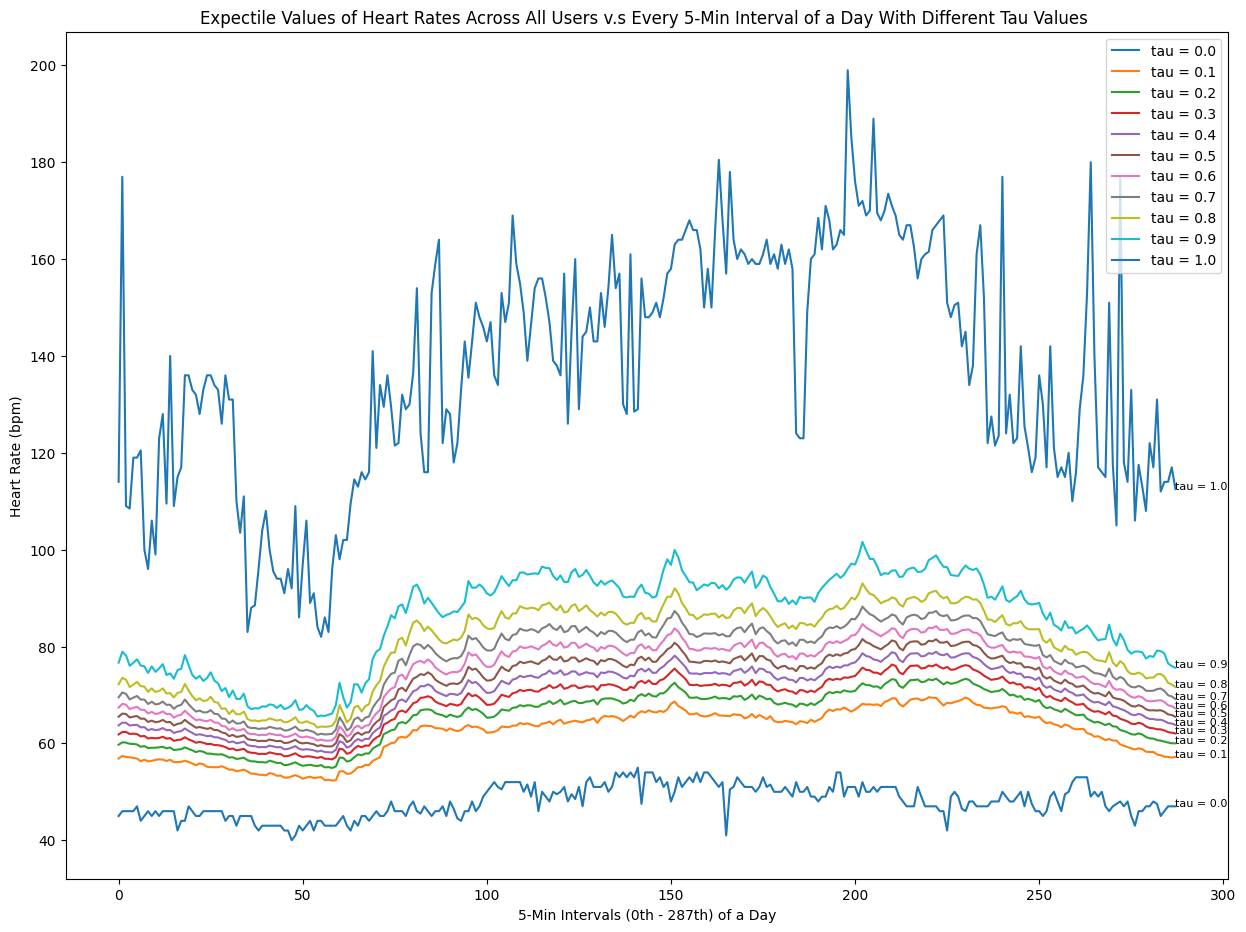

In [107]:
import matplotlib.pyplot as plt

# Get the times as x-array
# times_array = []
# for i in range(24):
#   for j in range(0, 60, 5):
#     hour = str(i) if i >= 10 else "0" + str(i)
#     minute = str(j) if j >= 10 else "0" + str(j)
#     time = hour + ":" + minute
#     times_array.append(time)
# print(times_array)


interval_array = np.arange(0, 288)
plt.figure(figsize=(15,11))
plt.ylabel("Heart Rate (bpm)")
plt.xlabel("5-Min Intervals (0th - 287th) of a Day")
plt.title("Expectile Values of Heart Rates Across All Users v.s Every 5-Min Interval of a Day With Different Tau Values ")
# Use a for loop and plot the expectiles at each interval for tau = 0 to 1
expectiles_array = []
for tau in np.arange(0, 1.1, 0.1):
  current_expectile_array = []
  for m in range(user_times_matrix.shape[0]):
    # Get the values at this time and exclude missing values
    time_row = user_times_matrix[m];
    exclude_na = time_row[~np.isnan(time_row)]

    # Calculate the expectile value at this time, append to the current_expectile
    expectile_val = scipy.stats.expectile(exclude_na, tau)
    current_expectile_array.append(expectile_val)

  # Plot this curve for each expectile val, also append to overall expectiles array
  plt.plot(interval_array, current_expectile_array, label=f"tau = {round(tau, 2)}")
  plt.annotate(f"tau = {round(tau,2)}" ,xy=(interval_array[-1], current_expectile_array[-1]), fontsize=8)
  expectiles_array.append(current_expectile_array)

plt.legend()